Keras	
    Introduction
    deep-learning->Keras API
        1.Image classification
        2.Text classification
        3.Credit card fraud detection
        
    Steps under keras:
    1.Prepare your data before training a model (by turning it into either NumPy arrays or tf.data.Dataset objects).
    2.Do data preprocessing, for instance feature normalization or vocabulary indexing.
    3.Build a model that turns your data into useful predictions, using the Keras Functional API.
    4.Train your model with the built-in Keras fit() method, while being mindful of checkpointing, metrics monitoring, and fault tolerance.
    5.Evaluate your model on a test data and how to use it for inference on new data.
    6.Customize what fit() does, for instance to build a GAN.
    7.Speed up training by leveraging multiple GPUs.
    8.Refine your model through hyperparameter tuning.
        
  Data loading & preprocessing:
    ->Neural networks don't process raw data, like text files, encoded JPEG image files, or CSV files. They process vectorized & standardized representations.

    ->Text files need to be read into string tensors, then split into words. Finally, the words need to be indexed & turned into integer tensors.
    ->Images need to be read and decoded into integer tensors, then converted to floating point and normalized to small values (usually between 0 and 1).
     -> CSV data needs to be parsed, with numerical features converted to floating point tensors and categorical features indexed and converted to integer tensors. Then each feature typically needs to be normalized to zero-mean and unit-variance.
    
    
	Tensorflow
	Theano and CNTK
	Developing with Keras
	Models
	Network of Layers
Setting up Keras	
    Loss Functions
	Running deep learning on the cloud
	Pre-processing techniques
  
Day 32:

Deep learning for computer vision	
    Convolutional Neural Networks
	Max-pooling
	Downloading the data
	Building the network
	Data Pre-processing
	Data Augmentation
Feature Extraction with Keras	
    Feature Extraction
	Fine-tuning
	Training-Testing Split
Visualizing	
    Visualizing immediate activations
	Visualizing convnet filters
	Visualizing heatmaps

1.Text preprocessing
    tf.keras.layers.TextVectorization: turns raw strings into an encoded representation that can be read by an Embedding layer or Dense layer.
2.Numerical features preprocessing
    tf.keras.layers.Normalization: performs feature-wise normalization of input features.
    tf.keras.layers.Discretization: turns continuous numerical features into integer categorical features.
3.Categorical features preprocessing
    tf.keras.layers.CategoryEncoding: turns integer categorical features into one-hot, multi-hot, or count dense representations.
    tf.keras.layers.Hashing: performs categorical feature hashing, also known as the "hashing trick".
    tf.keras.layers.StringLookup: turns string categorical values into an encoded representation that can be read by an Embedding layer or Dense layer.
    tf.keras.layers.IntegerLookup: turns integer categorical values into an encoded representation that can be read by an Embedding layer or Dense layer.
4.Image preprocessing
These layers are for standardizing the inputs of an image model.

tf.keras.layers.Resizing: resizes a batch of images to a target size.
tf.keras.layers.Rescaling: rescales and offsets the values of a batch of images (e.g. go from inputs in the [0, 255] range to inputs in the [0, 1] range.
tf.keras.layers.CenterCrop: returns a center crop of a batch of images.
5.Image data augmentation
These layers apply random augmentation transforms to a batch of images. They are only active during training.

tf.keras.layers.RandomCrop
tf.keras.layers.RandomFlip
tf.keras.layers.RandomTranslation
tf.keras.layers.RandomRotation
tf.keras.layers.RandomZoom
tf.keras.layers.RandomHeight
tf.keras.layers.RandomWidth
tf.keras.layers.RandomContrast


->The adapt() method:
Some preprocessing layers have an internal state that can be computed based on a sample of the training data. The list of stateful preprocessing layers is:

TextVectorization: holds a mapping between string tokens and integer indices
StringLookup and IntegerLookup: hold a mapping between input values and integer indices.
Normalization: holds the mean and standard deviation of the features.
Discretization: holds information about value bucket boundaries.



In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
import keras
import os
import cv2

#https://www.kaggle.com/code/shyambajaj/cat-and-dog-classification-using-keras/input

In [15]:
#pip install opencv-python

In [17]:
import os
folder_path="C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\training_set"
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.


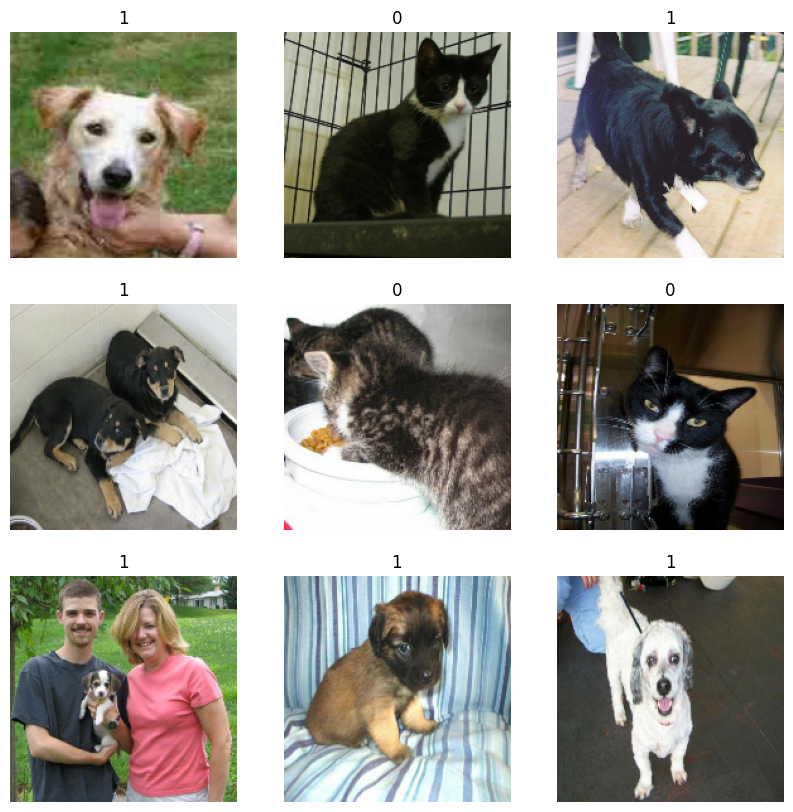

In [18]:
#visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [19]:
#Data Augumentation
S=64
from keras.preprocessing.image import ImageDataGenerator
training_set="C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\training_set"
test_set="C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\test_set"

trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)

trainDataset = trainDatagen.flow_from_directory(
        training_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

testDataset = testDatagen.flow_from_directory(
        test_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [20]:
#Cnn 
classifier = Sequential()
#1st layer of Convolutional layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))

#Max pooling -> Reduce the size heat map
#applying max pool to 1st cl to reduce heat map
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))

#Normalization -> Increasing ur learning rate
classifier.add(BatchNormalization())
#Dropout -> TO eliminate overfitting

classifier.add(Dropout(0.2))

In [21]:
#2nd Convolution layer
classifier.add(Convolution2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))


In [22]:
#3rd layer 

classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))


In [23]:
#Flattening the Layer 
classifier.add(Flatten())

In [24]:
#Adding fully connected layer
classifier.add(Dense(units=32,activation='relu'))


In [25]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [26]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)      

In [36]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('DogCatModel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [38]:
#Compiling with cnn
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fitting


history = classifier.fit(trainDataset,
                    steps_per_epoch=int(8000/batch_size),
                    epochs=20,
                    validation_data=testDataset,
                    validation_steps=int(2000/batch_size))

Epoch 1/20
62/62 [==============================] - 65s 1s/step - loss: 0.6643 - accuracy: 0.6285 - val_loss: 0.7469 - val_accuracy: 0.5083
Epoch 2/20
62/62 [==============================] - 60s 958ms/step - loss: 0.6248 - accuracy: 0.6512 - val_loss: 0.9782 - val_accuracy: 0.4854
Epoch 3/20
62/62 [==============================] - 92s 2s/step - loss: 0.6335 - accuracy: 0.6542 - val_loss: 0.9335 - val_accuracy: 0.5042
Epoch 4/20
62/62 [==============================] - 79s 1s/step - loss: 0.6226 - accuracy: 0.6593 - val_loss: 0.8940 - val_accuracy: 0.5188
Epoch 5/20
62/62 [==============================] - 53s 855ms/step - loss: 0.5827 - accuracy: 0.6845 - val_loss: 0.7021 - val_accuracy: 0.5938
Epoch 6/20
62/62 [==============================] - 42s 677ms/step - loss: 0.5870 - accuracy: 0.6880 - val_loss: 0.6994 - val_accuracy: 0.6229
Epoch 7/20
62/62 [==============================] - 34s 545ms/step - loss: 0.5938 - accuracy: 0.6739 - val_loss: 0.6106 - val_accuracy: 0.6771
Epoch 8/

In [39]:
classifier.save('DogCatModel.h5')

In [40]:
history.history

{'loss': [0.6642550826072693,
  0.6248225569725037,
  0.6334540843963623,
  0.6225974559783936,
  0.5827236175537109,
  0.5870470404624939,
  0.5937630534172058,
  0.5882446765899658,
  0.5605307221412659,
  0.569324254989624,
  0.5663648247718811,
  0.542887270450592,
  0.537827730178833,
  0.542266309261322,
  0.5416861772537231,
  0.5350238084793091,
  0.5435449481010437,
  0.5406522154808044,
  0.5210062861442566,
  0.5161874294281006],
 'accuracy': [0.6285282373428345,
  0.6512096524238586,
  0.6542338728904724,
  0.6592742204666138,
  0.6844757795333862,
  0.6880040168762207,
  0.6738911271095276,
  0.6824596524238586,
  0.7142137289047241,
  0.7021169066429138,
  0.7132056355476379,
  0.7220234870910645,
  0.7313507795333862,
  0.7253023982048035,
  0.7194685935974121,
  0.7298387289047241,
  0.7245784401893616,
  0.7281553149223328,
  0.7368951439857483,
  0.7424395084381104],
 'val_loss': [0.746893584728241,
  0.9781655669212341,
  0.933530867099762,
  0.8939561247825623,
  0.

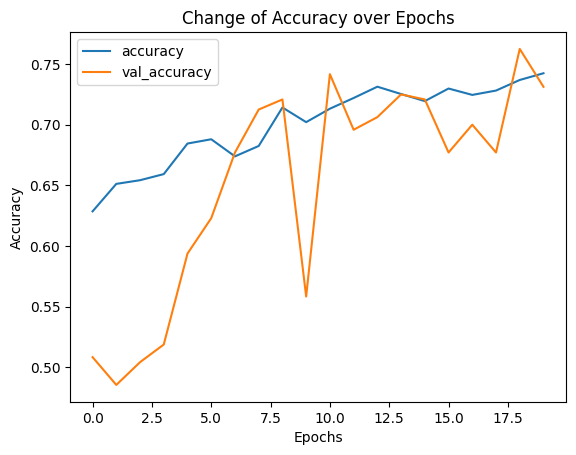

In [41]:
#validation

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs") 
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

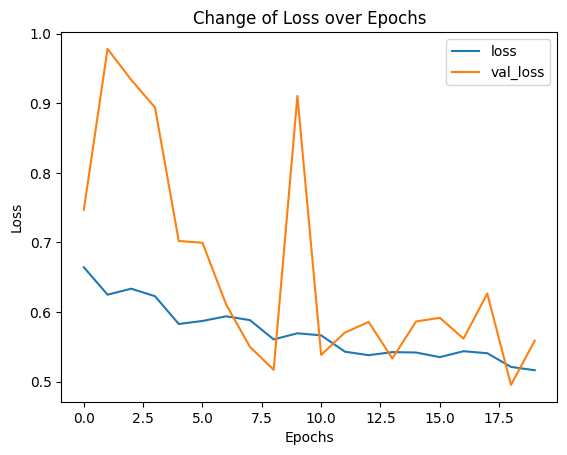

In [42]:
#plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

In [43]:
trainDataset.class_indices

{'cats': 0, 'dogs': 1}

In [4]:
import os
from tensorflow import keras
print(os.path.dirname("DogCatModel.h5"))
saved_model = keras.models.load_model(r"C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\DogCatModel.h5")
#saved_model = keras.models.load_model("CatDogModel.h5")

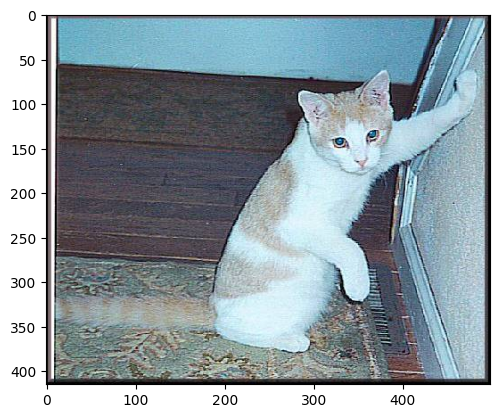

NameError: name 'classifier' is not defined

In [30]:
#Testing
test_set_cat="C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\test_set\\cats"
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
#for img in os.listdir(test_set_cat): 
 # imgCat = mpimg.imread("C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\test_set\\cats\\cat.4001.jpg")
  #plt.imshow(imgCat)
  #plt.show()

imgCat = mpimg.imread("C:\\Users\\bjawa\\Documents\\Vino-Shastra\\DS_PT_1\\Spec-DS\\test_set\\cats\\cat.4001.jpg")
plt.imshow(imgCat)
plt.show()

imgCat = cv2.resize(imgCat, (64,64))
imgCat = imgCat.reshape(1,64,64,3)

pred = classifier.predict(imgCat)
print("Probability that it is a Cat = ", "%.2f" % (1-pred))